In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

Params: n_papers = 1000, lr = 5, sm_runs_trsh = 0.99

In [2]:
fig_size = (9,7)

# 1. Comparison of the Baseline algorithms
### Dong vs Dawid vs MV

/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


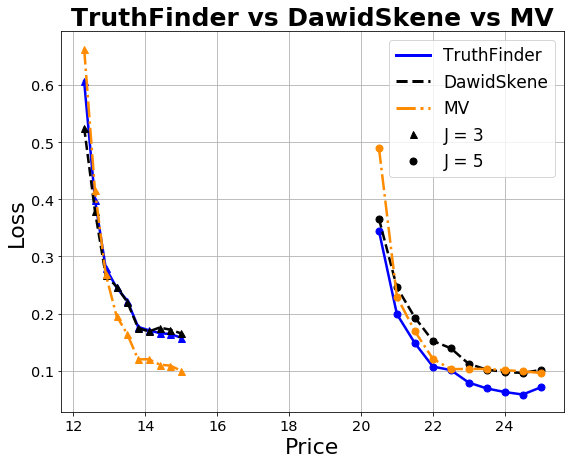

In [3]:
data = pd.read_csv('../output/data/dong_dawid_mv.csv')

title_size = 25
axes_size = 22
legend_size = 17
marker_size= 7
line_width = 2.5
label_size = 14.5

fig, ax = plt.subplots(figsize=fig_size)
colors = ['blue', 'black', 'darkorange']
plt.gca().set_color_cycle(colors)
J_arr = [3, 5]
algs_arr = ['dong', 'dawid', 'mv']
algs_name = ['TruthFinder', 'DawidSkene', 'MV']
style_list = ['-', '--', '-.']
handles = []
# legend set up
for  alg, col, st in zip(algs_name, colors, style_list):
    handles.append(mlines.Line2D([], [], color=col, marker='', label=alg, linewidth=3, linestyle=st))
handles.append(mlines.Line2D([], [], linestyle='none', color='black', marker='^', label='J = 3', markersize=marker_size))
handles.append(mlines.Line2D([], [], linestyle='none', color='black', marker='o', label='J = 5', markersize=marker_size))

def plot_alg(J, marker):
    for alg, st in zip(algs_arr, style_list):
        x = data.loc[(data['alg'] == alg) & (data['J'] == J)]['price_mean'].values
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)]['loss_mean'].values
        plt.plot(x, y, label='J={},  '.format(J)+alg, marker=marker, linewidth=line_width, markersize=marker_size, linestyle=st)

plot_alg(3, '^')
plot_alg(5, 'o')
    
plt.title('TruthFinder vs DawidSkene vs MV', size=title_size, fontweight='bold')
plt.xlabel('Price', size=axes_size)
plt.ylabel('Loss', size=axes_size)
plt.legend(handles=handles, fontsize=legend_size)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=label_size)
fig.savefig('charts/fig1.png', format='png', dpi=500)

# 2. Baseline vs Baseline-cr (that separate criteria)

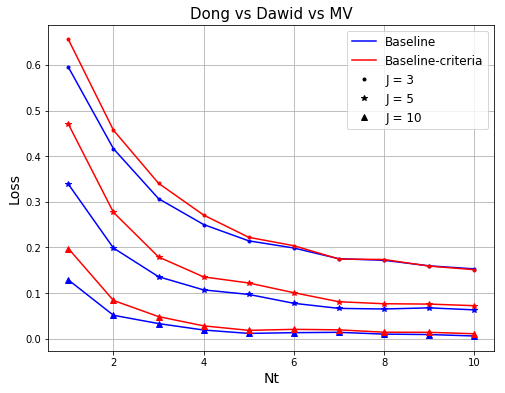

In [4]:
data = pd.read_csv('../output/data/baseline_vs_baseline_cr.csv')

fig, ax = plt.subplots(figsize=(8,6))
colors = ['blue', 'red']
plt.gca().set_color_cycle(colors)
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
algs_arr = ['Baseline', 'Baseline-criteria']
handles = []
# legend set up
for  alg, col in zip(algs_arr, colors):
    handles.append(mlines.Line2D([], [], color=col, marker='', label=alg))
handles.append(mlines.Line2D([], [], linestyle='none', color='black', marker='.', label='J = 3'))
handles.append(mlines.Line2D([], [], linestyle='none', color='black', marker='*', label='J = 5'))
handles.append(mlines.Line2D([], [], linestyle='none', color='black', marker='^', label='J = 10'))

def plot_alg(J, marker):
    for alg in algs_arr:
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)]['loss_mean'].values
        plt.plot(x, y, label='J={},  '.format(J)+alg, marker=marker)

plot_alg(3, '.')
plot_alg(5, '*')
plot_alg(10, '^')
    
plt.title('Dong vs Dawid vs MV', size=15)
plt.xlabel('Nt', size=14)
plt.ylabel('Loss', size=14)
plt.legend(handles=handles, fontsize = 12)
plt.grid()

# 3. SM-runs convergence
Chart shows the number of unclassified papers after i interactions

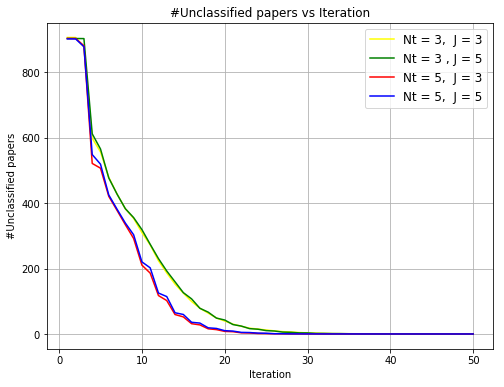

In [5]:
conv_data = pd.read_csv('../output/data/convergence_test.csv')

x_conv = range(1, 51)
y1 = conv_data.iloc[0].values[2:] #Nt=3 J=3
y2 = conv_data.iloc[1].values[2:] #Nt=3 J=5
y3 = conv_data.iloc[2].values[2:] #Nt=5 J=3
y4 = conv_data.iloc[3].values[2:] #Nt=5 J=5

fig, ax = plt.subplots(figsize=(8,6))
plt.gca().set_color_cycle(['yellow', 'green', 'red', 'blue', 'red'])
plt.plot(x_conv, y1)
plt.plot(x_conv, y2)
plt.plot(x_conv, y3)
plt.plot(x_conv, y4)
plt.legend(['Nt = 3,  J = 3', 'Nt = 3 , J = 5', 'Nt = 5,  J = 3', 'Nt = 5,  J = 5'], 
           loc='upper right', fontsize = 12)
plt.ylabel('#Unclassified papers')
plt.xlabel('Iteration')
plt.title('#Unclassified papers vs Iteration')
plt.grid()
plt.show()

# 4. SM-runs baseline round
The chart depicts Loss vs Price trade off for the proportion of papers p used in baseline iteration (p=0.1 means 10% from I). Each dot reflects the number of votes per criteria J. J = [1, ..., 10], lr = 5, sm_runs_trsh = 0.99, stop to iterate if within 5 iterations #Unclassified_papers remains the same.

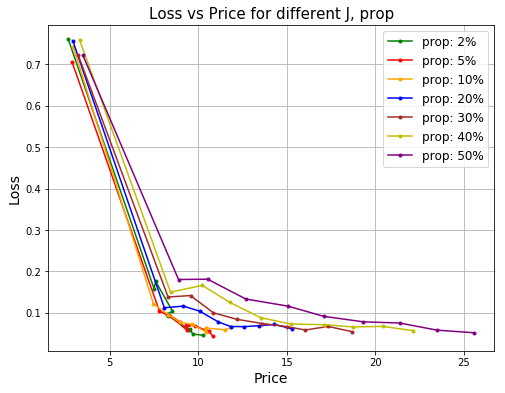

In [6]:
br = pd.read_csv('../output/data/baseline_round.csv')
br = br.loc[br['alg'] == 'SM-runs']

fig, ax = plt.subplots(figsize=(8,6))
plt.gca().set_color_cycle(['green', 'red', 'orange', 'blue', 'brown', 'y', 'purple'])
labels = br['fr_p'].unique()
for fr_p in labels:
    x = br.loc[br['fr_p'] == fr_p]['price_mean']
    y=br.loc[br['fr_p'] == fr_p]['loss_mean']
    plt.plot(x, y, label='p: {}'.format(fr_p), marker='.')
plt.title('Loss vs Price for different J, prop', size=15)
plt.xlabel('Price', size=14)
plt.ylabel('Loss', size=14)
# plt.legend(fontsize = 12)
plt.legend(['prop: 2%', 'prop: 5%', 'prop: 10%', 'prop: 20%',
           'prop: 30%', 'prop: 40%', 'prop: 50%'], 
           loc='upper right', fontsize = 12)
plt.grid()

# 5. Loss vs Nt
Loss vs Nt for baseline, M-runs, SM-runs. J = [3, 5], p = [0.1, 0.05], lr = 5, sm_runs_trsh = 0.99, stop to iterate if within 5 iterations #Unclassified_papers remains the same.

In [7]:
algs_arr = ['Baseline', 'SM-runs', 'M-runs']
colors = ['blue', 'black', 'darkorange']
# legend set up
handles = []
labels = []
for alg, col in zip(algs_arr, colors):
    handles.append(mlines.Line2D([], [], color=col, marker='', label=alg))
    labels.append(alg)
handles.append(mlines.Line2D([], [], linestyle='none', color='black', marker='.'))
handles.append(mlines.Line2D([], [], linestyle='none', color='black', marker='*'))
labels.append('J = 3')
labels.append('J = 5')

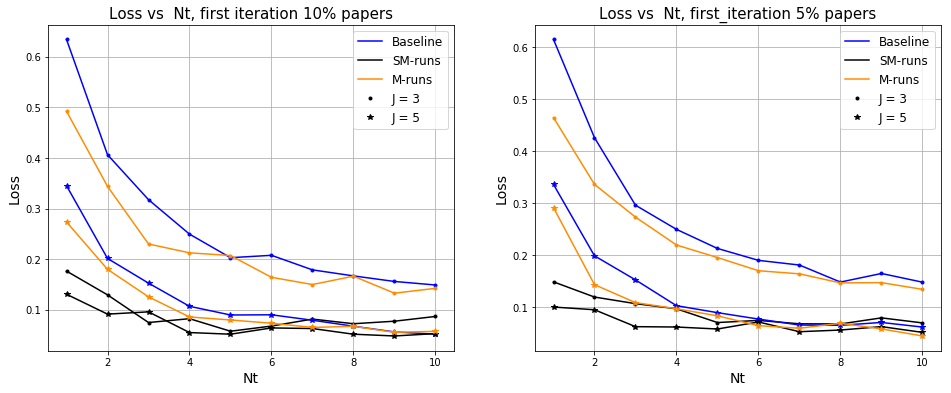

In [8]:
data = pd.read_csv('../output/data/loss_tests_lr5_fr01.csv')
data2 = pd.read_csv('../output/data/loss_tests_lr5_fr005.csv')

fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(16,6))
ax[0].set_color_cycle(colors)
# x = [1, 2, 3, 4, 5]
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
J_arr = [3, 5]

def plot_alg(data, J, marker, i):
    for alg in algs_arr:
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)]['loss_mean']
        ax[i].plot(x, y, label='J={},  '.format(J)+alg, marker=marker)

plot_alg(data, 3, '.', 0)
plot_alg(data, 5, '*', 0)   
ax[0].set_title('Loss vs  Nt, first iteration 10% papers', size=15)
ax[0].set_xlabel('Nt', size=14)
ax[0].set_ylabel('Loss', size=14)
ax[0].legend(handles, labels, fontsize = 12)
ax[0].grid()

ax[1].set_color_cycle(colors)
plot_alg(data2, 3, '.', 1)
plot_alg(data2, 5, '*', 1)   
ax[1].set_title('Loss vs  Nt, first_iteration 5% papers', size=15)
ax[1].set_xlabel('Nt', size=14)
ax[1].set_ylabel('Loss', size=14)
ax[1].legend(handles, labels, fontsize = 12)
ax[1].grid()



# 6. Loss vs Price

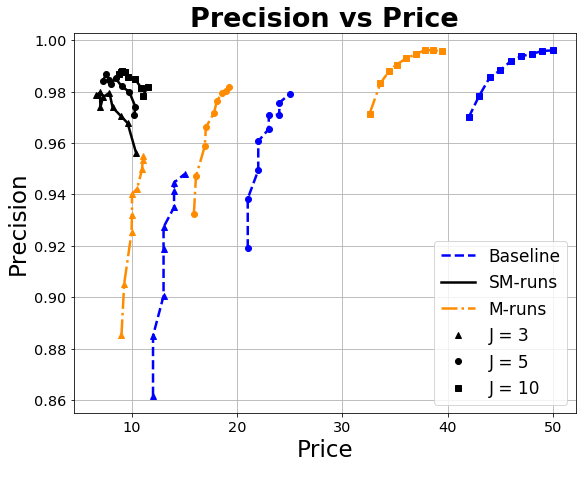

In [45]:
data2 = pd.read_csv('../output/data/fig2_a_b_stop100.csv')

title_size = 27
axis_size = 23
legend_size = 17
marker_size= 6
line_width = 2.5
label_size = 14.5

fig, ax = plt.subplots(figsize=fig_size)
ax.set_color_cycle(colors)

# legend set up
handles2 = []
labels2 = []
# legend set up
algs_arr = ['Baseline', 'SM-runs', 'M-runs']
colors = ['blue', 'black', 'darkorange']
markers = ['^', 'o', 's']
style_list = ['--', '-', '-.']

for alg, col, st in zip(algs_arr, colors, style_list):
    handles2.append(mlines.Line2D([], [], color=col, marker='', label=alg, linestyle=st, markersize=marker_size, linewidth=line_width))
    labels2.append(alg)
for marker, lable in zip(markers, ['J = 3', 'J = 5', 'J = 10']):
    handles2.append(mlines.Line2D([], [], linestyle='none', color='black', marker=marker, linewidth=3, markersize=marker_size))
    labels2.append(lable)


J = [3, 5, 10]
def plot_alg(data, J, marker):
    for alg, st in zip(algs_arr, style_list):
        x = data.loc[(data['alg'] == alg) & (data['J'] == J)]['price_mean'].values
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)]['precision'].values
        plt.plot(x, y, label='J={},  '.format(J)+alg, marker=marker, markersize=marker_size, linestyle=st, linewidth=line_width)

for j, m in zip(J, markers):
    plot_alg(data2, j, m)
plt.title('Precision vs Price', size=title_size, fontweight='bold')
plt.xlabel('Price\n', size=axis_size)
plt.ylabel('Precision', size=axis_size)
plt.legend(handles2, labels2, fontsize = legend_size)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=label_size)
# fig.savefig('charts/fig2_b.png', format='png', dpi=500)

# 7. Loss vs price

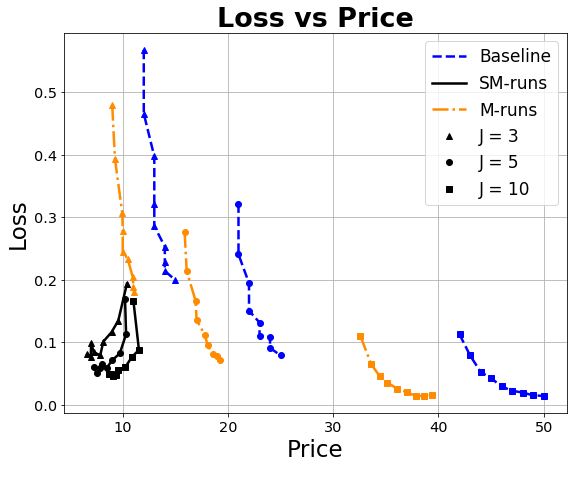

In [44]:
data2 = pd.read_csv('../output/data/fig2_a_b_stop100.csv')

title_size = 27
axis_size = 23
legend_size = 17
marker_size= 6
line_width = 2.5
label_size = 14.5

fig, ax = plt.subplots(figsize=fig_size)
ax.set_color_cycle(colors)

# legend set up
handles2 = []
labels2 = []
# legend set up
algs_arr = ['Baseline', 'SM-runs', 'M-runs']
colors = ['blue', 'black', 'darkorange']
markers = ['^', 'o', 's']
style_list = ['--', '-', '-.']

for alg, col, st in zip(algs_arr, colors, style_list):
    handles2.append(mlines.Line2D([], [], color=col, marker='', label=alg, linestyle=st, markersize=marker_size, linewidth=line_width))
    labels2.append(alg)
for marker, lable in zip(markers, ['J = 3', 'J = 5', 'J = 10']):
    handles2.append(mlines.Line2D([], [], linestyle='none', color='black', marker=marker, linewidth=3, markersize=marker_size))
    labels2.append(lable)


J = [3, 5, 10]
def plot_alg(data, J, marker):
    for alg, st in zip(algs_arr, style_list):
        x = data.loc[(data['alg'] == alg) & (data['J'] == J)]['price_mean'].values
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)]['loss_mean'].values
        plt.plot(x, y, label='J={},  '.format(J)+alg, marker=marker, markersize=marker_size, linestyle=st, linewidth=line_width)

for j, m in zip(J, markers):
    plot_alg(data2, j, m)
plt.title('Loss vs Price', size=title_size, fontweight='bold')
plt.xlabel('Price\n', size=axis_size)
plt.ylabel('Loss', size=axis_size)
plt.legend(handles2, labels2, fontsize = legend_size)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=label_size)
# fig.savefig('charts/fig2_a.png', format='png', dpi=500)

# 8. Loss vs Price (Zoomed SM-runs)

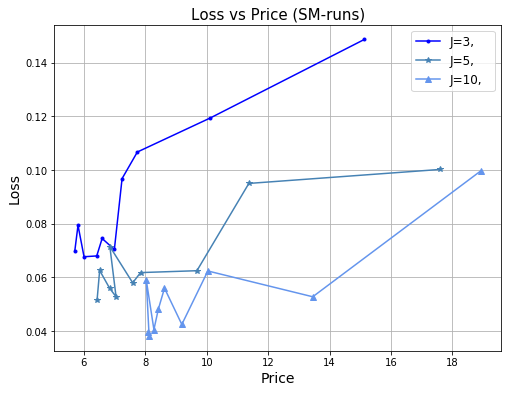

In [11]:
data = pd.read_csv('../output/data/loss_tests_lr5_fr005.csv')
data = data.loc[(data['alg'] == 'SM-runs')]

fig, ax = plt.subplots(figsize=(8,6))
plt.gca().set_color_cycle(['b', 'steelblue', 'cornflowerblue'])

def plot_alg(J, marker):
    y = data.loc[(data['J'] == J)]['loss_mean'].values
    x = data.loc[(data['J'] == J)]['price_mean'].values
    err = data.loc[(data['J'] == J)]['loss_std'].values
    plt.plot(x, y, label='J={},  '.format(J), marker=marker)
#     plt.errorbar(x, y, yerr=err, marker=marker)

plot_alg(3, '.')
plot_alg(5, '*')
plot_alg(10, '^')

plt.title('Loss vs Price (SM-runs)', size=15)
plt.xlabel('Price', size=14)
plt.ylabel('Loss', size=14)
plt.legend(fontsize = 12)
plt.grid()

# 9. Presicion, Recall vs Nt, J

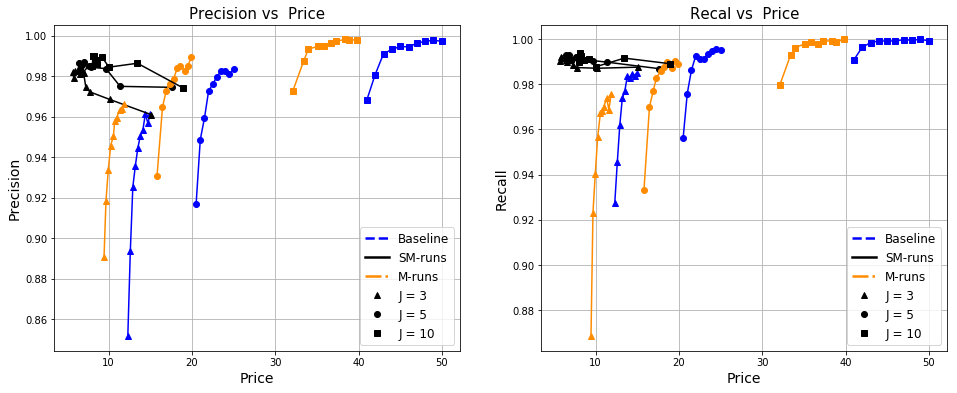

In [12]:
data = pd.read_csv('../output/data/fig.csv')

colors = ['blue', 'black', 'darkorange']
fig, ax = plt.subplots(nrows=1, ncols=2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(16,6))
ax[0].set_color_cycle(colors)
J = [3, 5, 10]

def plot_alg(data, J, marker, i, metric):
    for alg in algs_arr:
        x = data.loc[(data['alg'] == alg) & (data['J'] == J)]['price_mean'].values
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)][metric].values
        ax[i].plot(x, y, label='J={},  '.format(J)+alg, marker=marker)

for j, marker in zip(J, markers):
    plot_alg(data, j, marker, 0, 'precision')        
ax[0].set_title('Precision vs  Price', size=15)
ax[0].set_xlabel('Price', size=14)
ax[0].set_ylabel('Precision', size=14)
ax[0].legend(handles2, labels2, fontsize = 12)
ax[0].grid()

ax[1].set_color_cycle(colors)
for j, marker in zip(J, markers):
    plot_alg(data, j, marker, 1, 'recall') 
ax[1].set_title('Recal vs  Price', size=15)
ax[1].set_xlabel('Price', size=14)
ax[1].set_ylabel('Recall', size=14)
ax[1].legend(handles2, labels2, fontsize = 12)
ax[1].grid()

# 10. Vary papers per worker

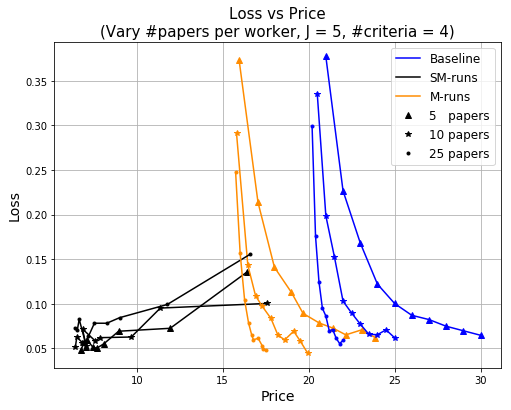

In [13]:
data1 = pd.read_csv('../output/data/loss_tests_cr5_paper5_20worker.csv')
data1 =data1.loc[(data1['J'] == 5)] # 5 baselins vs 20 m_runs
data2 = pd.read_csv('../output/data/loss_tests_lr5_fr005.csv')
data2 = data2.loc[(data2['J'] == 5)] # 10 baselins vs 40 m_runs
data3 = pd.read_csv('../output/data/loss_tests_cr5_paper25_100worker.csv')
data3 =data3.loc[(data3['J'] == 5)] # 25 baselins vs 100 m_runs

colors = ['blue', 'black', 'darkorange']
markers = ['^', '*', '.']
labels = ['5   papers', '10 papers', '25 papers']
# legend set up
handles3 = []
labels3 = []
for alg, col in zip(algs_arr, colors):
    handles3.append(mlines.Line2D([], [], color=col, marker='', label=alg))
    labels3.append(alg)
for marker, lable in zip(markers, labels):
    handles3.append(mlines.Line2D([], [], linestyle='none', color='black', marker=marker))
    labels3.append(lable)

fig, ax = plt.subplots(figsize=(8,6))
plt.gca().set_color_cycle(colors)

def plot_alg(data, marker, label):
    for alg in algs_arr:
        x = data.loc[data['alg'] == alg]['price_mean']
        y = data.loc[data['alg'] == alg]['loss_mean']
        plt.plot(x, y, label=alg+' '+label, marker=marker)

for data, marker, label in zip([data1, data2, data3], markers, labels):
    plot_alg(data, marker, label)
    
plt.title('Loss vs Price\n(Vary #papers per worker, J = 5, #criteria = 4)', size=15)
plt.xlabel('Price', size=14)
plt.ylabel('Loss', size=14)
plt.legend(handles3, labels3, fontsize = 12)
plt.grid()

# 11. Vary accuracy error (Recall)

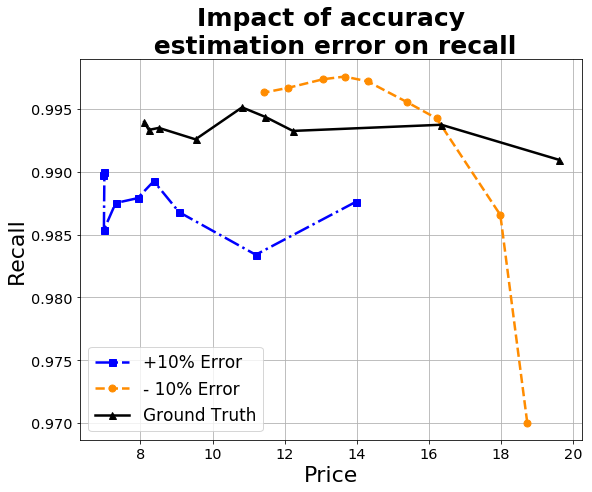

In [57]:
data = pd.read_csv('../output/data/fig2_e_f_stop1500.csv')

title_size = 25
axes_size = 22
legend_size = 17
marker_size= 7
line_width = 2.5
label_size = 14.5

handles_er = []
labels_er = ['+10% Error', '- 10% Error', 'Ground Truth']
handles_er.append(mlines.Line2D([], [], color='blue', marker='s', label='+10% Error', linestyle='-.', markersize=marker_size, linewidth=line_width))
handles_er.append(mlines.Line2D([], [], color='darkorange', marker='o', label=' -10% Error', linestyle='--', markersize=marker_size, linewidth=line_width))
handles_er.append(mlines.Line2D([], [], color='black', marker='^', label='Ground Truth', linestyle='-', markersize=marker_size, linewidth=line_width))

fig, ax = plt.subplots(figsize=fig_size)
colors = ['blue', 'darkorange', 'black']
ax.set_color_cycle(colors)

markers = ['s', 'o', '^']
style_list = ['-.', '--', '-']

m = 5
# M = [3, 5, 100]
acc_terms = ['10', '-10', 'gt']
def plot_alg(data, marker, acc_term, st):
    x = data.loc[(data['acc_term'] == acc_term) ]['price_mean'].values
    y = data.loc[(data['acc_term'] == acc_term) ]['recall'].values
    plt.plot(x, y, label='M={}, acc_err={} '.format(m, acc_term), marker=marker, linewidth=line_width, markersize=marker_size, linestyle=st)

for marker, acc_term, st in zip(markers, acc_terms, style_list):
    plot_alg(data, marker, acc_term, st)
plt.title('Impact of accuracy\n estimation error on recall',size=title_size, fontweight='bold')
plt.xlabel('Price', size=axes_size)
plt.ylabel('Recall', size=axes_size)
plt.tick_params(axis='both', which='major', labelsize=label_size)
plt.legend(handles_er, labels_er, fontsize=legend_size)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=label_size)
# fig.savefig('charts/fig2_f_stop1500.png', format='png', dpi=500)

# 11.1 Vary accuracy error (Precision)

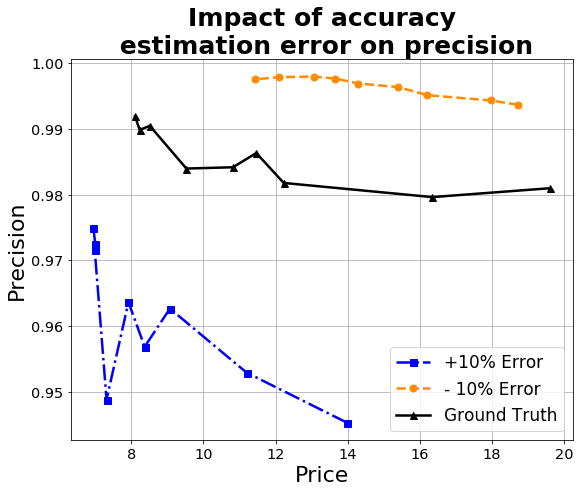

In [54]:
data = pd.read_csv('../output/data/fig2_e_f_stop1500.csv')

title_size = 25
axes_size = 22
legend_size = 17
marker_size= 7
line_width = 2.5
label_size = 14.5

handles_er = []
labels_er = ['+10% Error', '- 10% Error', 'Ground Truth']
handles_er.append(mlines.Line2D([], [], color='blue', marker='s', label='+10% Error', linestyle='-.', markersize=marker_size, linewidth=line_width))
handles_er.append(mlines.Line2D([], [], color='darkorange', marker='o', label=' -10% Error', linestyle='--', markersize=marker_size, linewidth=line_width))
handles_er.append(mlines.Line2D([], [], color='black', marker='^', label='Ground Truth', linestyle='-', markersize=marker_size, linewidth=line_width))

fig, ax = plt.subplots(figsize=fig_size)
colors = ['blue', 'darkorange', 'black']
ax.set_color_cycle(colors)

markers = ['s', 'o', '^']
style_list = ['-.', '--', '-']

m = 5
# M = [3, 5, 100]
acc_terms = ['10', '-10', 'gt']
def plot_alg(data, marker, acc_term, st):
    x = data.loc[(data['acc_term'] == acc_term) ]['price_mean'].values
    y = data.loc[(data['acc_term'] == acc_term) ]['precision'].values
    plt.plot(x, y, label='M={}, acc_err={} '.format(m, acc_term), marker=marker, linewidth=line_width, markersize=marker_size, linestyle=st)

for marker, acc_term, st in zip(markers, acc_terms, style_list):
    plot_alg(data, marker, acc_term, st)
plt.title('Impact of accuracy\n estimation error on precision',size=title_size, fontweight='bold')
plt.xlabel('Price', size=axes_size)
plt.ylabel('Precision', size=axes_size)
plt.tick_params(axis='both', which='major', labelsize=label_size)
plt.legend(handles_er, labels_er, fontsize=legend_size)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=label_size)
# fig.savefig('charts/fig2_e_stop1500.png', format='png', dpi=500)

# 12. Vary power error

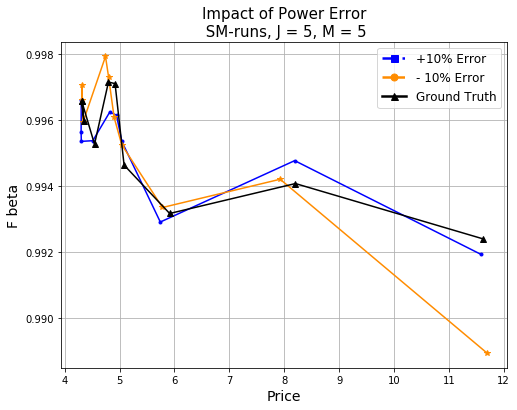

In [16]:
data = pd.read_csv('../output/data/power_criteria_experiment_varyM.csv')

fig, ax = plt.subplots(figsize=(8,6))
ax.set_color_cycle(colors)
theta = 0.3

markers = ['.', '*', '^']
m=5

pow_terms = ['10', '-10', 'gt']
def plot_alg(data, marker, pow_term):
    x = data.loc[(data['pow_term'] == pow_term) & (data['M'] == m) & (data['theta'] == theta)]['price_mean'].values
    y = data.loc[(data['pow_term'] == pow_term) & (data['M'] == m) & (data['theta'] == theta)]['f_beta'].values
    plt.plot(x, y, label='M={}, acc_err={} '.format(m, pow_term), marker=marker)

for marker, pow_term in zip(markers, pow_terms):
    plot_alg(data, marker, pow_term)
plt.title('Impact of Power Error\n SM-runs, J = 5, M = 5', size=15)
plt.xlabel('Price', size=14)
plt.ylabel('F beta', size=14)
plt.legend(handles_er, labels_er, fontsize = 12)
plt.grid()

# 14. ROC curves

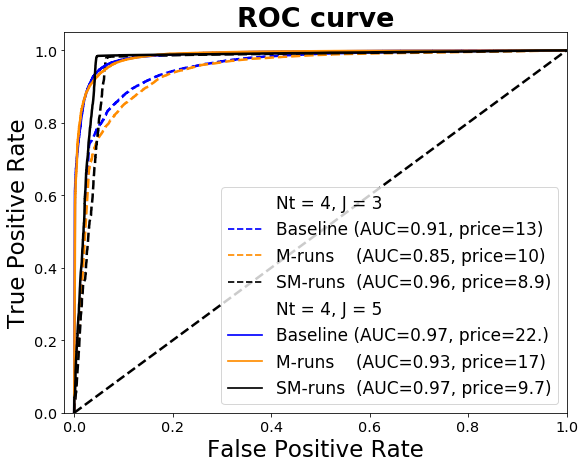

In [67]:
data = pd.read_csv('../output/data/roc_curves_nt4_j3.csv')

title_size = 27
axis_size = 23
legend_size = 17
marker_size= 6
line_width = 2.5
label_size = 14.5

colors = ['blue', 'black', 'darkorange']
fig, ax = plt.subplots(figsize=fig_size)

x_b = data['x_b'].dropna()
y_b = data['y_b'].dropna()
x_m = data['x_m'].dropna()
y_m = data['y_m'].dropna()
x_sm = data['x_sm'].dropna()
y_sm = data['y_sm'].dropna()
auc_b = data['auc_b'].dropna().values[0]
auc_m = data['auc_m'].dropna().values[0]
auc_sm = data['auc_sm'].dropna().values[0]

lw = 1.7
# Nt=4 J=3

handles = []
handles.append(mlines.Line2D([], [], linestyle='none', color='black', label='Nt = 4, J = 3                ', ))
handles.append(mlines.Line2D([], [], color='blue', lw=lw, label='Baseline (AUC=%0.2f, price=13)' % auc_b, linestyle='--', linewidth=line_width))
handles.append(mlines.Line2D([], [], color='darkorange', lw=lw, label='M-runs    (AUC=%0.2f, price=10)' % auc_m, linestyle='--', linewidth=line_width))
handles.append(mlines.Line2D([], [], color='black', lw=lw, label='SM-runs  (AUC=%0.2f, price=8.9)' % auc_sm, linestyle='--', linewidth=line_width))
plt.legend(handles=handles,loc="lower right", fontsize = legend_size)
plt.plot(x_b, y_b, color='blue', lw=lw, linestyle='--', linewidth=line_width)
plt.plot(x_m, y_m, color='darkorange', lw=lw, linestyle='--', linewidth=line_width)
plt.plot(x_sm, y_sm, color='black', lw=lw, linestyle='--', linewidth=line_width)


# Nt=4 J=5
data = pd.read_csv('../output/data/roc_curves_nt4_j5.csv')
x_b = data['x_b'].dropna()
y_b = data['y_b'].dropna()
x_m = data['x_m'].dropna()
y_m = data['y_m'].dropna()
x_sm = data['x_sm'].dropna()
y_sm = data['y_sm'].dropna()
auc_b = data['auc_b'].dropna().values[0]
auc_m = data['auc_m'].dropna().values[0]
auc_sm = data['auc_sm'].dropna().values[0]

handles.append(mlines.Line2D([], [], linestyle='none', color='black', label='Nt = 4, J = 5                '))
handles.append(mlines.Line2D([], [], color='blue', lw=lw, label='Baseline (AUC=%0.2f, price=22.)' % auc_b, linestyle='-', linewidth=line_width))
handles.append(mlines.Line2D([], [], color='darkorange', lw=lw, label='M-runs    (AUC=%0.2f, price=17)' % auc_m, linestyle='-', linewidth=line_width))
handles.append(mlines.Line2D([], [], color='black', lw=lw, label='SM-runs  (AUC=%0.2f, price=9.7)' % auc_sm, linestyle='-', linewidth=line_width))


plt.plot(x_b, y_b, color='blue', linestyle='-', lw=lw, linewidth=line_width)
plt.plot(x_m, y_m, color='darkorange', linestyle='-', lw=lw, linewidth=line_width)
plt.plot(x_sm, y_sm, color='black', linestyle='-', lw=lw, linewidth=line_width)
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--', linewidth=line_width)
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',  size=axis_size)
plt.ylabel('True Positive Rate',  size=axis_size)
plt.title('ROC curve',  size=title_size, fontweight='bold')
plt.legend(handles=handles,loc="lower right", fontsize = legend_size)
plt.tick_params(axis='both', which='major', labelsize=label_size)
# fig.savefig('charts/fig2_c.png', format='png', dpi=500)
plt.show()

# 15. Ecperimental results

## Precision

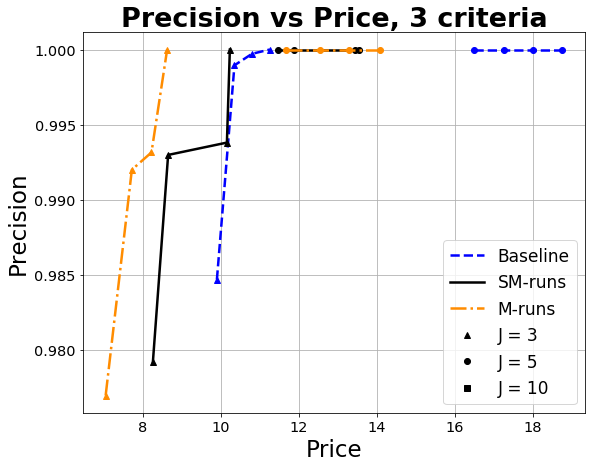

In [70]:
data = pd.read_csv('../output/data/experimental_results_cr3_stp100_delete30.csv')

title_size = 27
axis_size = 23
legend_size = 17
marker_size= 6
line_width = 2.5
label_size = 14.5

colors = ['blue', 'black', 'darkorange']
fig, ax = plt.subplots(figsize=fig_size)
ax.set_color_cycle(colors)

algs_arr = ['Baseline', 'SM-runs', 'M-runs']
colors = ['blue', 'black', 'darkorange']
markers = ['^', 'o', 's']
style_list = ['--', '-', '-.']

J = [3, 5, 10]
def plot_alg(data, J, marker):
    for alg, st in zip(algs_arr, style_list):
        x = data.loc[(data['alg'] == alg) & (data['J'] == J)]['price_mean'].values
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)]['precision'].values
        plt.plot(x, y, label='J={},  '.format(J)+alg, marker=marker, markersize=marker_size, linestyle=st, linewidth=line_width)

for j, marker in zip(J, markers):
    plot_alg(data, j, marker)

# plot_alg(data, 5, '.')
plt.title('Precision vs Price, 3 criteria', size=title_size, fontweight='bold')
plt.xlabel('Price', size=axis_size)
plt.ylabel('Precision', size=axis_size)
plt.legend(handles2, labels2, fontsize = legend_size)
plt.tick_params(axis='both', which='major', labelsize=label_size)
plt.grid()
# fig.savefig('charts/fig4.png', format='png', dpi=500)

## Recall

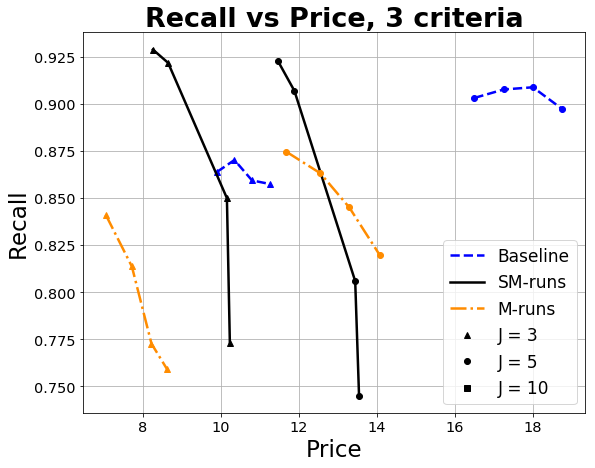

In [71]:
data = pd.read_csv('../output/data/experimental_results_cr3_stp100_delete30.csv')

title_size = 27
axis_size = 23
legend_size = 17
marker_size= 6
line_width = 2.5
label_size = 14.5

colors = ['blue', 'black', 'darkorange']
fig, ax = plt.subplots(figsize=fig_size)
ax.set_color_cycle(colors)

algs_arr = ['Baseline', 'SM-runs', 'M-runs']
colors = ['blue', 'black', 'darkorange']
markers = ['^', 'o', 's']
style_list = ['--', '-', '-.']

J = [3, 5, 10]
def plot_alg(data, J, marker):
    for alg, st in zip(algs_arr, style_list):
        x = data.loc[(data['alg'] == alg) & (data['J'] == J)]['price_mean'].values
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)]['recall'].values
        plt.plot(x, y, label='J={},  '.format(J)+alg, marker=marker, markersize=marker_size, linestyle=st, linewidth=line_width)

for j, marker in zip(J, markers):
    plot_alg(data, j, marker)

# plot_alg(data, 5, '.')
plt.title('Recall vs Price, 3 criteria', size=title_size, fontweight='bold')
plt.xlabel('Price', size=axis_size)
plt.ylabel('Recall', size=axis_size)
plt.legend(handles2, labels2, fontsize = legend_size)
plt.tick_params(axis='both', which='major', labelsize=label_size)
plt.grid()
# fig.savefig('charts/fig4.png', format='png', dpi=500)

## Loss

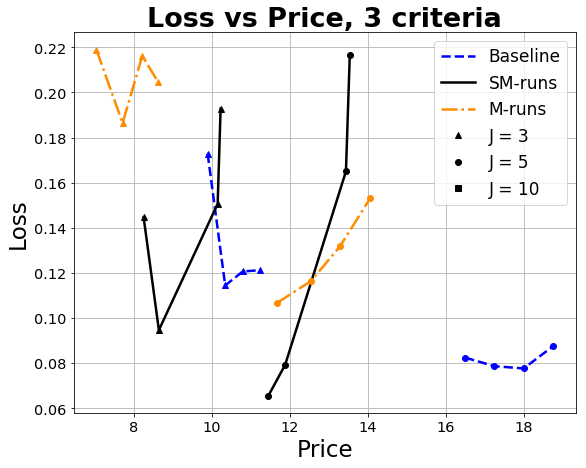

In [72]:
data = pd.read_csv('../output/data/experimental_results_cr3_stp100_delete30.csv')

title_size = 27
axis_size = 23
legend_size = 17
marker_size= 6
line_width = 2.5
label_size = 14.5

colors = ['blue', 'black', 'darkorange']
fig, ax = plt.subplots(figsize=fig_size)
ax.set_color_cycle(colors)

algs_arr = ['Baseline', 'SM-runs', 'M-runs']
colors = ['blue', 'black', 'darkorange']
markers = ['^', 'o', 's']
style_list = ['--', '-', '-.']

J = [3, 5, 10]
def plot_alg(data, J, marker):
    for alg, st in zip(algs_arr, style_list):
        x = data.loc[(data['alg'] == alg) & (data['J'] == J)]['price_mean'].values
        y = data.loc[(data['alg'] == alg) & (data['J'] == J)]['loss_mean'].values
        plt.plot(x, y, label='J={},  '.format(J)+alg, marker=marker, markersize=marker_size, linestyle=st, linewidth=line_width)

for j, marker in zip(J, markers):
    plot_alg(data, j, marker)

# plot_alg(data, 5, '.')
plt.title('Loss vs Price, 3 criteria', size=title_size, fontweight='bold')
plt.xlabel('Price', size=axis_size)
plt.ylabel('Loss', size=axis_size)
plt.legend(handles2, labels2, fontsize = legend_size)
plt.tick_params(axis='both', which='major', labelsize=label_size)
plt.grid()
# fig.savefig('charts/fig4.png', format='png', dpi=500)